## Problem Statement
Digital payments are evolving, but so are cyber criminals. According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.
In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging. As fraudster change tactics, learning algorithm can be improvised adding more analyzed features. 
As a data scientist, you are required to construct a ML model based on the available data and justify how mature your model is for industry (bank- payment gateways or  VISA / Mastercard) in categorization & authorization of transaction based on efficiency in fraud detection.

## Short summary of statement
A ML model is to be constructed based on available data and fraud cases which could predict fraudent transaction in future. So that alert can be generated to the owner of the card and the transaction can be blocked.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Exploratory data analysis
## 1. Understanding the data

In [2]:
#read cc_fraud dataset
dataset = pd.read_csv('card_transdata.csv')
dataset.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [3]:
dataset.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
dataset.shape

(1000000, 8)

In [5]:
dataset.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


## 2. Identify independent/target variables


In [7]:
dataset.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

**Independent variables/features are :**

**Categorical attributes -** 'repeat_retailer','used_chip','used_pin_number','online_order

**Numberical attributes -**'distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price'

**Identified dependent/target variable is 'fraud'**

## 3. Univariate analysis on target variable 

In [8]:
dataset['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [9]:
dataset['fraud'].value_counts(normalize=True)

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

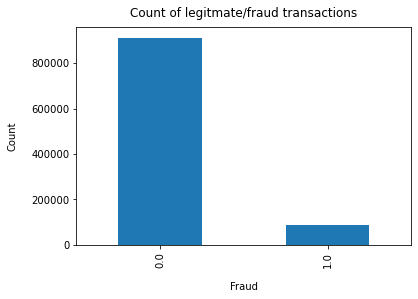

In [10]:
dataset['fraud'].value_counts().plot.bar()
plt.xlabel("Fraud", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of legitmate/fraud transactions", y=1.02);


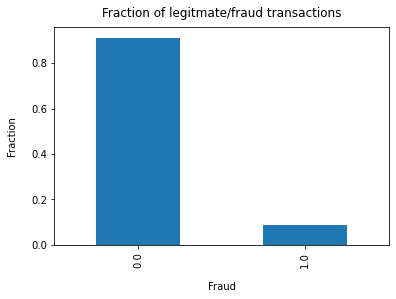

In [11]:
dataset['fraud'].value_counts(normalize=True).plot.bar()
plt.xlabel("Fraud", labelpad=14)
plt.ylabel("Fraction", labelpad=14)
plt.title("Fraction of legitmate/fraud transactions", y=1.02);

**Around 91 percent of dataset consist 0 (No Fraud) and 9 percent contains 1(Fraud happened)**

## 4. Univariate analysis on categorical independent variables

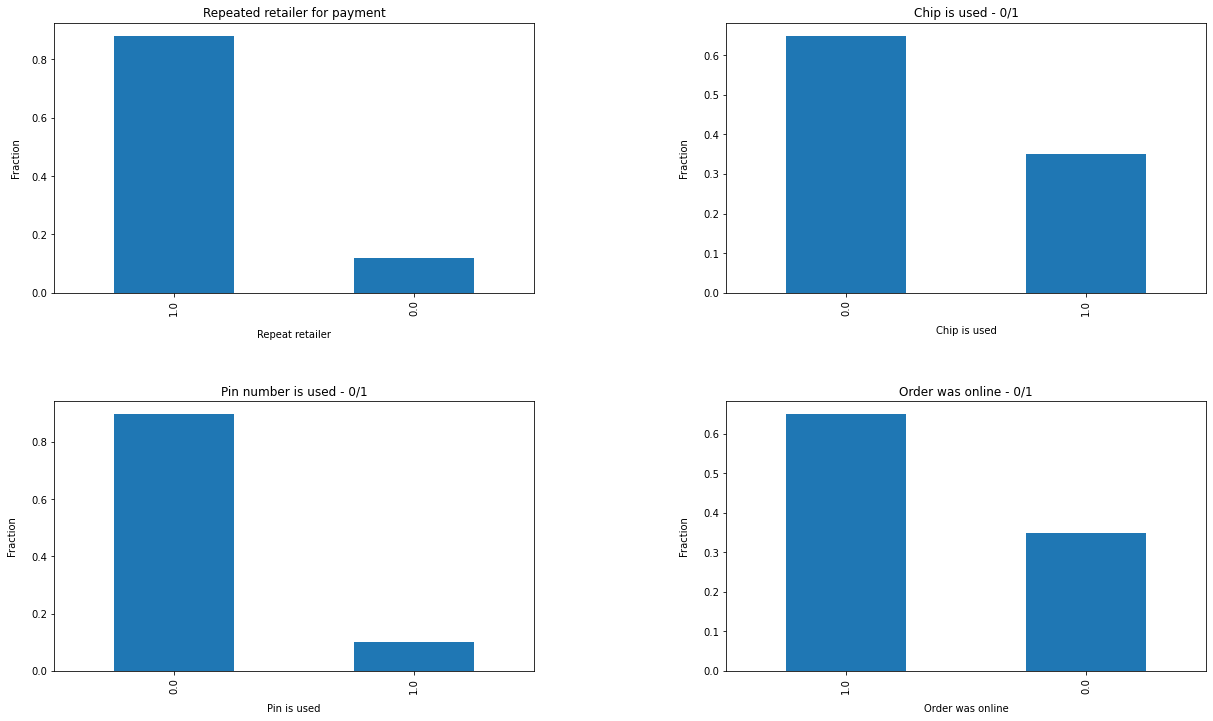

In [12]:
plt.figure(2)
plt.subplot(221)
dataset['repeat_retailer'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Repeated retailer for payment')
plt.xlabel("Repeat retailer", labelpad=14)
plt.ylabel("Fraction", labelpad=10)
plt.subplot(222)
dataset['used_chip'].value_counts(normalize=True).plot.bar(title= 'Chip is used - 0/1')
plt.xlabel("Chip is used", labelpad=10)
plt.ylabel("Fraction", labelpad=14)
plt.subplot(223)
dataset['used_pin_number'].value_counts(normalize=True).plot.bar(title= 'Pin number is used - 0/1')
plt.xlabel("Pin is used", labelpad=10)
plt.ylabel("Fraction", labelpad=14)
plt.subplot(224)
dataset['online_order'].value_counts(normalize=True).plot.bar(title= 'Order was online - 0/1')
plt.xlabel("Order was online", labelpad=10)
plt.ylabel("Fraction", labelpad=14)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

**Data is not uniformally distributed. More than 60 percent of values of features are having one value.**

    repeated_retailer : In around 85 percent of transactions, Transactions was made from repeat retailers

    used_chip         : In around 65% of the transactions, Card chip was used

    used_pin_number   : In around 15% of the transations, pin number was used

    online_order      : In around 65% of the transactions, the order was placed online

## 5. Univariate analysis on numerical independent variables

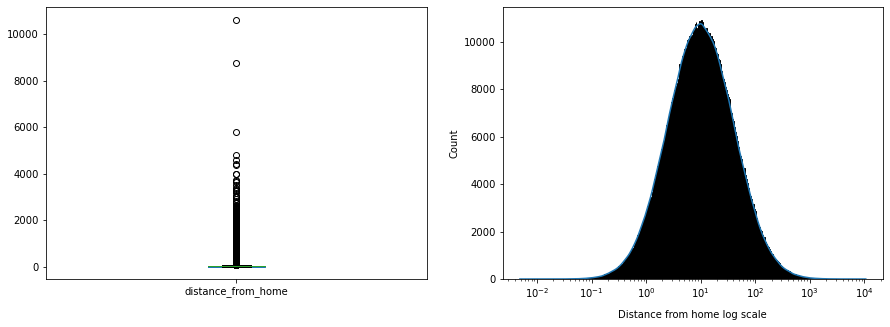

In [13]:
plt.figure(2)
plt.subplot(121)
dataset['distance_from_home'].plot.box(figsize=(15,5))
plt.subplot(122)
sns.histplot(data=dataset,x='distance_from_home',log_scale=True,kde=True)
plt.xlabel("Distance from home log scale", labelpad=10)
plt.show()

**Outliers are detected in 'distance_from_home' features.**
From the second chart it can be stated that taking the log of feature can normalize the feature 'distance_from_home' is normal. 

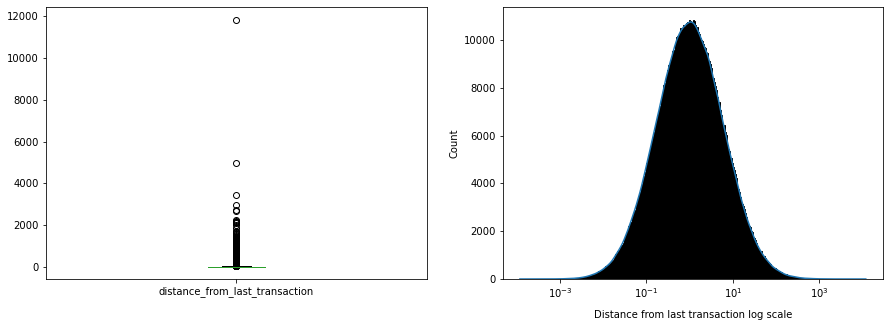

In [14]:
plt.figure(3)
plt.subplot(121)
dataset['distance_from_last_transaction'].plot.box(figsize=(15,5))
plt.subplot(122)
sns.histplot(data=dataset,x='distance_from_last_transaction',log_scale=True,kde=True)
plt.xlabel("Distance from last transaction log scale", labelpad=10)
plt.show()

**Outliers are detected in 'distance_from_last_transaction' features.**
From the second chart it can be stated that taking the log of feature can normalize the feature 'distance_from_last_transaction' is normal. 

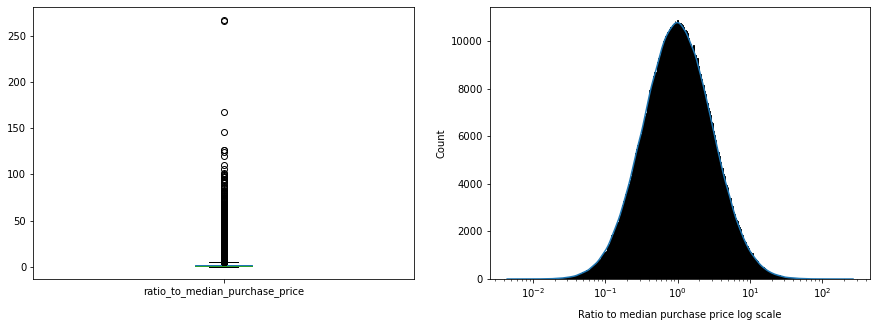

In [15]:
plt.figure(4)
plt.subplot(121)
dataset['ratio_to_median_purchase_price'].plot.box(figsize=(15,5))
plt.subplot(122)
sns.histplot(data=dataset,x='ratio_to_median_purchase_price',log_scale=True,kde=True)
plt.xlabel("Ratio to median purchase price log scale", labelpad=10)
plt.show()

**Outliers are detected in 'ratio_to_median_purchase_price' features.**
From the second chart it can be stated that taking the log of feature can normalize the feature 'ratio_to_median_purchase_price' is normal. 

## 6. Bivariate analysis (Categorical features vs target feature)

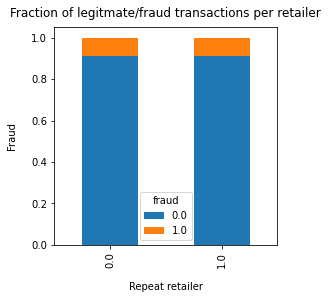

In [16]:
repeat_retailer = pd.crosstab(dataset['repeat_retailer'],dataset['fraud'])
repeat_retailer.div(repeat_retailer.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("Repeat retailer", labelpad=14)
plt.ylabel("Fraud", labelpad=14)
plt.title("Fraction of legitmate/fraud transactions per retailer", y=1.02);

**Around 10 percent of fraud happened to repeat retailers transaction, same holds true also for non repeated retailers.**

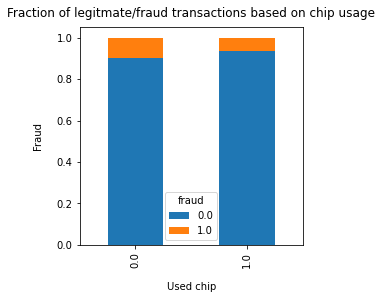

In [17]:
used_chip = pd.crosstab(dataset['used_chip'],dataset['fraud'])
used_chip.div(used_chip.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("Used chip", labelpad=14)
plt.ylabel("Fraud", labelpad=14)
plt.title("Fraction of legitmate/fraud transactions based on chip usage", y=1.02);

**Around 5 percent of fraud happened when card chip is used and 10% of fraud happened when chip was not used.**

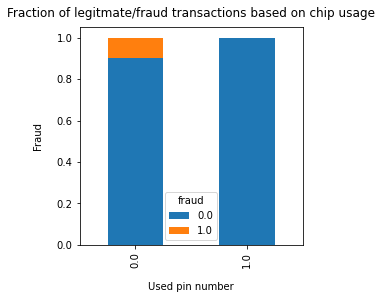

In [18]:
used_pin_number = pd.crosstab(dataset['used_pin_number'],dataset['fraud'])
used_pin_number.div(used_pin_number.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("Used pin number", labelpad=14)
plt.ylabel("Fraud", labelpad=14)
plt.title("Fraction of legitmate/fraud transactions based on chip usage", y=1.02);

**Around 10 percent of fraudent transactions happened when card pin was not used, <1% of fraudent transactions happened when card pin was not used.**

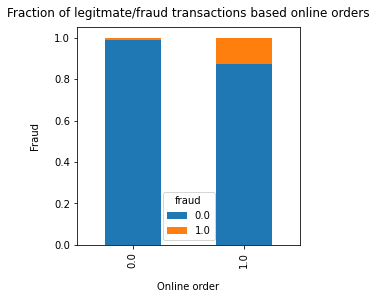

In [19]:
online_order = pd.crosstab(dataset['online_order'],dataset['fraud'])
online_order.div(online_order.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("Online order", labelpad=14)
plt.ylabel("Fraud", labelpad=14)
plt.title("Fraction of legitmate/fraud transactions based online orders", y=1.02);

**Around 15 percent of fraudent transactions happened when order was online,2-3% of thefraudent transactions happened when order was not online.**

## 7. Bivariate analysis(Numerical feature vs target feature)

<Figure size 432x288 with 0 Axes>

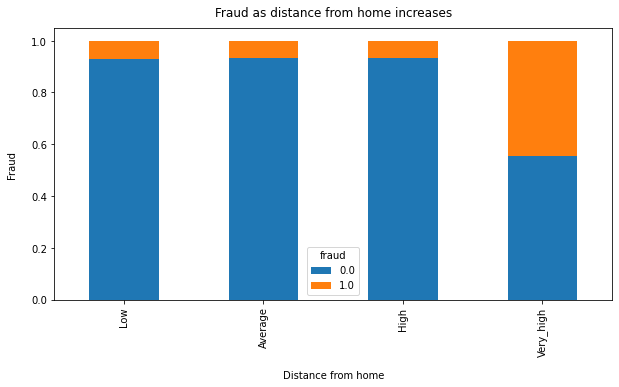

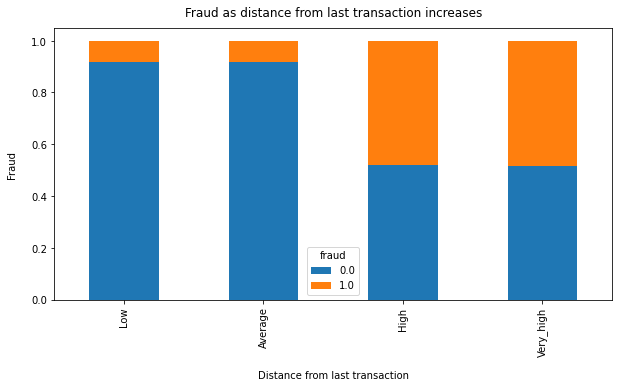

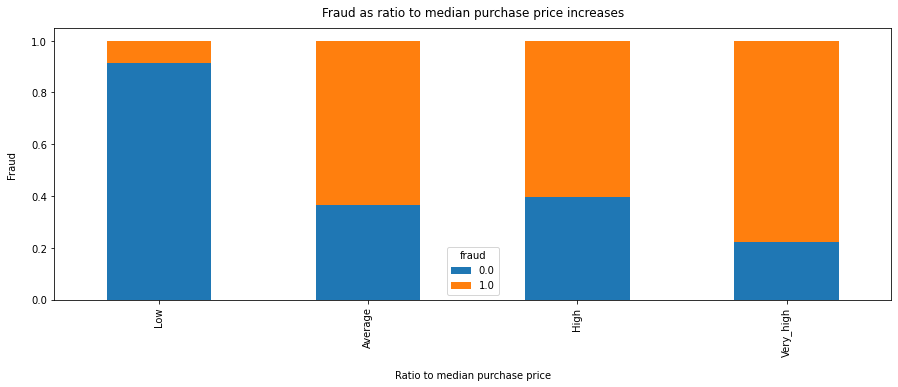

In [20]:
dataset_bin = dataset.copy()
ibin=[0,10,50,100,1000]
group=['Low','Average','High','Very_high']
dataset_bin['ibin']=pd.cut(dataset_bin['distance_from_home'],ibin,labels=group)

cibin=[0,10,50,100,1000]
group=['Low','Average','High','Very_high']
dataset_bin['cibin']=pd.cut(dataset_bin['distance_from_last_transaction'],cibin,labels=group)

tbin=[0,25,50,100,200]
group=['Low','Average','High','Very_high']
dataset_bin['tbin']=pd.cut(dataset_bin['ratio_to_median_purchase_price'],tbin,labels=group)   

ct1=pd.crosstab(dataset_bin['ibin'],dataset_bin['fraud'])
ct2=pd.crosstab(dataset_bin['cibin'],dataset_bin['fraud'])
ct3=pd.crosstab(dataset_bin['tbin'],dataset_bin['fraud'])

plt.figure(5)
ct1.div(ct1.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,5))
plt.xlabel("Distance from home", labelpad=14)
plt.ylabel("Fraud", labelpad=14)
plt.title("Fraud as distance from home increases", y=1.02);
ct2.div(ct2.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,5))
plt.xlabel("Distance from last transaction", labelpad=14)
plt.ylabel("Fraud", labelpad=14)
plt.title("Fraud as distance from last transaction increases", y=1.02);
ct3.div(ct3.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(15,5))
plt.xlabel("Ratio to median purchase price", labelpad=14)
plt.ylabel("Fraud", labelpad=14)
plt.title("Fraud as ratio to median purchase price increases", y=1.02);
plt.show()



**There is trend of increasing fraud transaction with the increase in value of distance_from_home, distance_from_last_transaction and ratio_to_median_purchase_price**

## 8. Correlation analysis

In [21]:
matrix = dataset.corr() 
matrix

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


<AxesSubplot:>

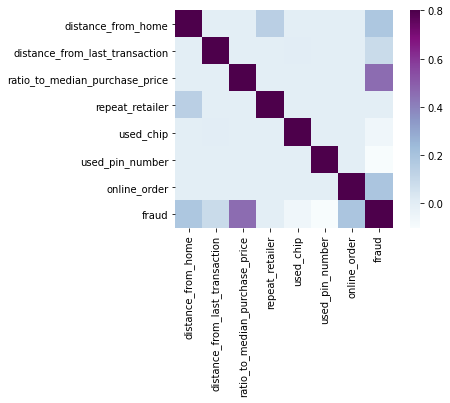

In [22]:
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

**No major correlation found between the variables. All the features are independent. So all the features needs to be taken in analysis.**

# Data preprocessing

## 1. Duplicate rows treatment

In [23]:
duplicate=dataset.duplicated()
duplicate.value_counts()

False    1000000
dtype: int64

**No duplicate row detected**

## 2. Missing value treatment

In [24]:
dataset.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

**Missing values are not Identified in the dataset**

## 3. Outliers Treatment
Outliers were deletected in the univariate analysis of the numberical attributes. Also we have seen that taking the log of the data can make these attributes normally distributed

In [25]:
dataset['distance_from_home'] = np.log(dataset['distance_from_home'])
dataset['distance_from_last_transaction'] = np.log(dataset['distance_from_last_transaction'])
dataset['ratio_to_median_purchase_price'] = np.log(dataset['ratio_to_median_purchase_price'])

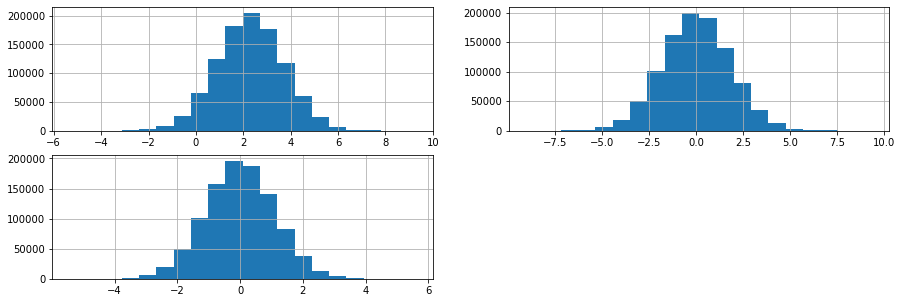

In [26]:
plt.figure(8)
plt.subplot(221)
dataset['distance_from_home'] .hist(bins=20,figsize=(15,5))
plt.subplot(222)
dataset['distance_from_last_transaction'] .hist(bins=20)
plt.subplot(223)
dataset['ratio_to_median_purchase_price'] .hist(bins=20)
plt.show()

**Outliers are treated successfully. Now the distribution is much closer to the normal**

## Label and one-hot encoding
As the dataset doesn't contains the ordinal variables so label encoding is not required
Also as we have binary categorical attributes so no need of dummy variables(It will only make things redundant) so no one-hot encoding

# Independent variable/target variable split

In [27]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1:].values.ravel()

## Split dataset in training and test set
As it is not a balanced class problem (Not all the catagory in target variable have same say). More than 90% of the dataset contains fraud = 0 so we need stratified train test split to keep both the catagory in train as well as test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1, stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(800000, 7) (200000, 7) (800000,) (200000,)


## Feature scaling
To make each and every feature effecive against the target variable we need to scale all the independent variable to same scale

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)


## Logistic regression

In [30]:
#Fit logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

#Predict the test set results
Y_pred_log_reg = classifier.predict(X_test)


## Check logistic regression performance

In [31]:
#Check performation using confusion matrix
from sklearn import metrics

#Check performation using accuracy
print("The accuracy is ",metrics.accuracy_score(Y_test,Y_pred_log_reg))

#Check performation using recall
print("The recall score is ",metrics.recall_score(Y_test,Y_pred_log_reg))

#Check performation using precision score
print("The precision score is ",metrics.precision_score(Y_test,Y_pred_log_reg))

#Check performation using precision score
print("The F1 score is ",metrics.f1_score(Y_test,Y_pred_log_reg))

#Check performation using confusion matrix
print("The confusion matrix is\n",metrics.confusion_matrix(Y_test,Y_pred_log_reg))

#AUC (Arear under ROC charecteristics curve)
print("\nThe AUC under ROC curve is ",metrics.roc_auc_score(Y_test,Y_pred_log_reg))

The accuracy is  0.947065
The recall score is  0.5380699044677077
The precision score is  0.7892263802651451
The F1 score is  0.6398857103983129
The confusion matrix is
 [[180007   2512]
 [  8075   9406]]

The AUC under ROC curve is  0.762153476880603


## Decision tree

In [32]:
#Fit Decision tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)

#Predict the test set results
Y_pred_dec_tree = classifier.predict(X_test)


## Check decision tree performance

In [33]:
#Check performation using confusion matrix
from sklearn import metrics

#Check performation using accuracy
print("The accuracy is ",metrics.accuracy_score(Y_test,Y_pred_dec_tree))

#Check performation using recall
print("The recall score is ",metrics.recall_score(Y_test,Y_pred_dec_tree))

#Check performation using precision score
print("The precision score is ",metrics.precision_score(Y_test,Y_pred_dec_tree))

#Check performation using precision score
print("The F1 score is ",metrics.f1_score(Y_test,Y_pred_dec_tree))

#Check performation using confusion matrix
print("The confusion matrix is\n",metrics.confusion_matrix(Y_test,Y_pred_dec_tree))

#AUC (Arear under ROC charecteristics curve)
print("\nThe AUC under ROC curve is ",metrics.roc_auc_score(Y_test,Y_pred_dec_tree))

The accuracy is  0.99913
The recall score is  0.9913620502259596
The precision score is  0.998674580764133
The F1 score is  0.9950048802893724
The confusion matrix is
 [[182496     23]
 [   151  17330]]

The AUC under ROC curve is  0.995618017973997


## K-nearest neighbour

In [34]:
#Fit KNN
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)

#Predict the test set results
Y_pred_knn = classifier.predict(X_test)


## Check KNN performance

In [35]:
#Check performation using confusion matrix
from sklearn import metrics

#Check performation using accuracy
print("The accuracy is ",metrics.accuracy_score(Y_test,Y_pred_knn))

#Check performation using recall
print("The recall score is ",metrics.recall_score(Y_test,Y_pred_knn))

#Check performation using precision score
print("The precision score is ",metrics.precision_score(Y_test,Y_pred_knn))

#Check performation using precision score
print("The F1 score is ",metrics.f1_score(Y_test,Y_pred_knn))

#Check performation using confusion matrix
print("The confusion matrix is\n",metrics.confusion_matrix(Y_test,Y_pred_knn))

#AUC (Arear under ROC charecteristics curve)
print("\nThe AUC under ROC curve is ",metrics.roc_auc_score(Y_test,Y_pred_knn))

The accuracy is  0.996155
The recall score is  0.9618442880842057
The precision score is  0.993970205722393
The F1 score is  0.9776433991336454
The confusion matrix is
 [[182417    102]
 [   667  16814]]

The AUC under ROC curve is  0.9806427210779183


## Random Forest

In [36]:
#Fit Random forest
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=20)
classifier.fit(X_train,Y_train)

#Predict the test set results
Y_pred_random_forest = classifier.predict(X_test)


## Check random forest performance

In [37]:
#Check performation using confusion matrix
from sklearn import metrics

#Check performation using accuracy
print("The accuracy is ",metrics.accuracy_score(Y_test,Y_pred_random_forest))

#Check performation using recall
print("The recall score is ",metrics.recall_score(Y_test,Y_pred_random_forest))

#Check performation using precision score
print("The precision score is ",metrics.precision_score(Y_test,Y_pred_random_forest))

#Check performation using precision score
print("The F1 score is ",metrics.f1_score(Y_test,Y_pred_random_forest))

#Check performation using confusion matrix
print("The confusion matrix is\n",metrics.confusion_matrix(Y_test,Y_pred_random_forest))

#AUC (Arear under ROC charecteristics curve)
print("\nThe AUC under ROC curve is ",metrics.roc_auc_score(Y_test,Y_pred_random_forest))

The accuracy is  0.99914
The recall score is  0.9914764601567416
The precision score is  0.9986747335061942
The F1 score is  0.995062578941325
The confusion matrix is
 [[182496     23]
 [   149  17332]]

The AUC under ROC curve is  0.995675222939388


# Choosing the best model out of 4 models

With respect to the fraud detection 

- True Positive(TP)  - Transaction predicted as fraud was fraud

- False Positive(FP) - Transaction predicted as fraud was, not fraud

- True negative(TN)  - Transaction predicted as non-fraud but was a fraud

- False negative(FN) - Transaction predicted as non-fraud, was non-fraud

Precision is the rate of TP divided by the (TP+FP). Recall, on the other hand, is the number of TP divided by the (TP_FN).
Card fraud is the unauthorized use of card to make purchases.Card companies have an obligation to protect their customers’ finances. They freeze a user’s card if transaction activity is predicted as fraud. The penalty for mislabeling a fraud transaction as non-fraud is having a user’s money stolen. On the other hand, the penalty for mislabeling a non-fraud transaction as fraud is having the card frozen.
SO we can see that true negative will be most costly to the system,So we need to have low recall score and high accuracy.

**So in conclusion:**
1. **We can use Confusion Matrix to understand model performance**
2. **The cost of False Negatives is much higher than the cost of False Positives.**
3. **The best model should have high accuracy and low recall score**

## Based on above results we can say that the random forest algorithm performs best in terms of accuracy, recall  and AUC scores

## 

